# 11월 매수 4월 매도

In [2]:
!pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import FinanceDataReader as fdr

<AxesSubplot: xlabel='Date'>

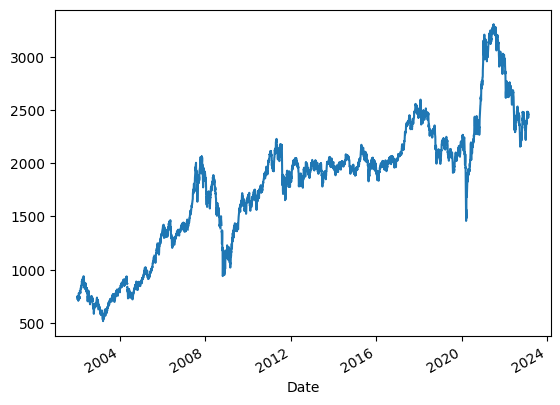

In [4]:
kospi = fdr.DataReader('KS11', '2002')
kospi['Close'].plot()

In [5]:
kospi['ror'] = kospi['Close'].pct_change()
kospi['cum_ror'] = (kospi['ror'] + 1).cumprod() - 1
today_cum_ror = kospi['cum_ror'].iloc[-1]
today_cum_ror

2.4091039259131697

In [7]:
start_date = kospi.index[0]
end_date = kospi.index[-1]
year = (end_date - start_date).days / 365

In [9]:
CAGR = (1 + today_cum_ror) ** (1/year) -1
CAGR

0.05974027802743809

[실습] 삼성전자의 연평균 수익률, 누적수익률을 계산

In [ ]:
CAGR = (1 + today_cum_ror) ** (1/year) -1

In [10]:
samsung = fdr.DataReader('005930', '2002')

In [30]:
samsung['ror'] = samsung['Close'].pct_change()  # 연평균 수익률
samsung['cum_ror'] = (1 + samsung['ror']).cumprod() -1 # 누적수익률
year = (samsung.index[0] - samsung.index[-1]).days / 365
samsung['CAGR'] = (1 + samsung['cum_ror']) ** (1/year) -1
samsung['CAGR']

Date
2002-01-02         NaN
2002-01-03    0.000931
2002-01-04   -0.001659
2002-01-07   -0.001511
2002-01-08   -0.000534
                ...   
2023-02-10   -0.104031
2023-02-13   -0.104098
2023-02-14   -0.104300
2023-02-15   -0.103624
2023-02-16   -0.104500
Name: CAGR, Length: 5223, dtype: float64

In [27]:
samsung.index[-1]

Timestamp('2023-02-16 00:00:00')

## 할로윈 투자

In [32]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume,ror,cum_ror
Date,,,,,,,,
2002-01-02,698.000000,725.059998,690.359985,724.950012,724.950012,618700.0,NaN,NaN
2002-01-03,726.760010,735.770020,722.349976,727.659973,727.659973,752600.0,0.003738,0.003738
2002-01-04,744.460022,750.830017,739.140015,747.719971,747.719971,630700.0,0.027568,0.031409
2002-01-07,748.539978,757.809998,735.549988,751.479980,751.479980,753600.0,0.005029,0.036596
2002-01-08,747.210022,750.890015,734.760010,734.760010,734.760010,799300.0,-0.022249,0.013532


In [31]:
# 코스피의 월별 수익률의 총합을 바그래프로 그리기

In [52]:
코스피수익률총합 = kospi['Close'].pct_change().resample('MS').mean()
코스피수익률총합.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Date', length=254, freq='MS')

뭔가 format써서 만들고 뒤에 두자리로 뽑아내면 좋을 것 같은데 구현력이 안된다

In [80]:
#1, 같은 월의 데이터를 모아준다.
month_kospi_price = kospi.resample('MS').agg({'Open':'first' , 'Close':'last'})
month_kospi_price.head()

#2. 같은 월끼리 합산
month_kospi_price['ror'] = month_kospi_price.pct_change(axis = 1).iloc[:,-1]  # pct_change(axis = 1) : open -> Close에 어떻게 변화율 을 남ㄱ미.
month_kospi_price.head()

#3. 같은 월끼리 합산
month_kospi_price['Month'] = month_kospi_price.index.month
month_kospi_price.head()

#4. 같은 월끼리 !!
sum_month_ror = month_kospi_price.groupby('Month').sum()[['ror']]
sum_month_ror.head()

,ror
Month,
1,-0.011423
2,0.130483
3,0.225519
4,0.548773
5,-0.084862


<AxesSubplot: xlabel='Month'>

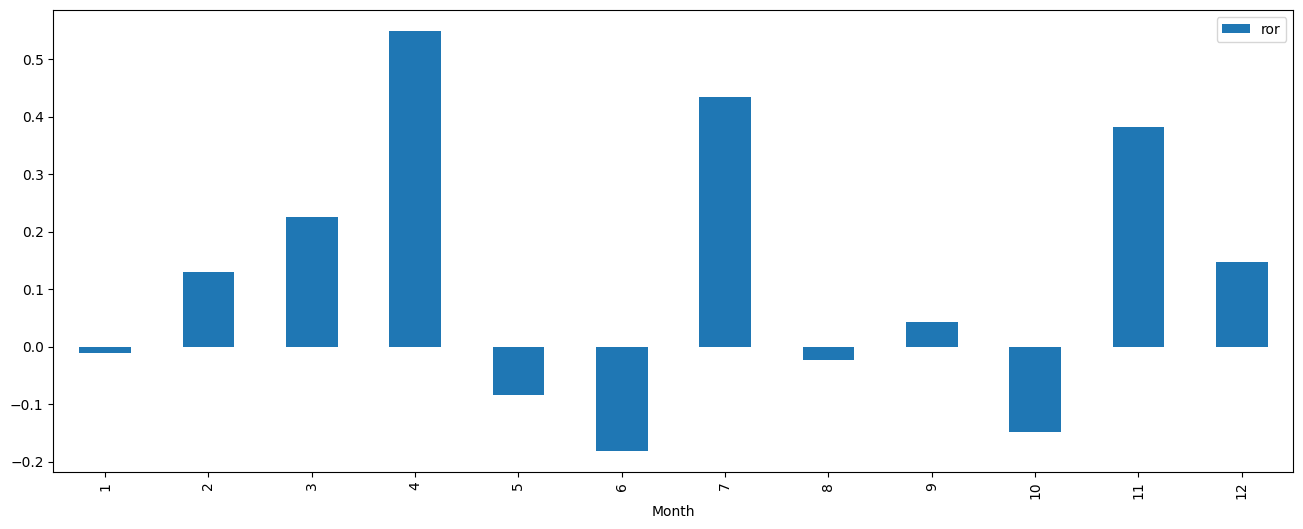

In [81]:
sum_month_ror.plot.bar(figsize = (16,6))

In [82]:
print('단순보유 누적 수익률:' , today_cum_ror)

단순보유 누적 수익률: 2.4091039259131697


## 11월 매수 4월에 매도

In [89]:
kospi_price = month_kospi_price[['Open', 'Close', 'Month']].copy()
kospi_price.head()

,Open,Close,Month
Date,,,
2002-01-01,698.000000,748.070007,1
2002-02-01,757.070007,819.989990,2
2002-03-01,842.210022,895.580017,3
2002-04-01,900.469971,842.340027,4
2002-05-01,855.409973,796.400024,5


In [91]:
subset_kospi_price = kospi_price[kospi_price['Month'].isin([4, 11])]
subset_kospi_price.head()

,Open,Close,Month
Date,,,
2002-04-01,900.469971,842.340027,4
2002-11-01,652.340027,724.799988,11
2003-04-01,529.070007,599.349976,4
2003-11-01,783.080017,796.179993,11
2004-04-01,878.780029,862.840027,4


In [ ]:
# 11월 open 4월 close
# index, column 에 무엇이 와야할까 어떤 정보가 필요할까

In [104]:
month4 = subset_kospi_price[subset_kospi_price['Month'] == 4][['Close']]
month11 = subset_kospi_price[subset_kospi_price['Month'] == 11][['Open']]
month4_lag1 = month4.shift(-1)

In [108]:
month4_lag1.index = month4_lag1.index.year
month11.index = month11.index.year

In [96]:
month11.head()

,Open
Date,
2002-11-01,652.340027
2003-11-01,783.080017
2004-11-01,832.520020
2005-11-01,1165.770020
2006-11-01,1372.030029


In [111]:
import pandas as pd
HWN_kospi_price = pd.concat([month4_lag1, month11], axis = 1)
HWN_kospi_price.head()

,Close,Open
Date,,
2002,599.349976,652.340027
2003,862.840027,783.080017
2004,911.299988,832.520020
2005,1419.729980,1165.770020
2006,1542.239990,1372.030029


In [115]:
HWN_kospi_price['ror'] = (HWN_kospi_price['Close'] / HWN_kospi_price['Open']) -1
HWN_kospi_price['cum_ror'] = (HWN_kospi_price['ror'] + 1).cumprod() - 1
HWN_kospi_price['cum_ror'].head()

Date
2002   -0.081231
2003    0.012350
2004    0.108147
2005    0.349554
2006    0.516975
Name: cum_ror, dtype: float64

In [116]:
HWN_kospi_price = HWN_kospi_price.dropna(axis = 0)
last_cum_ror = HWN_kospi_price['cum_ror'].iloc[-1]

In [117]:
year = HWN_kospi_price.index[-1] - HWN_kospi_price.index[0]
HWN_CAGR = (1 + last_cum_ror) ** (1/year) - 1
HWN_CAGR
# 단순방식은 0.05가 나왔으므로(위에거) 할로윈방식이 1% 더 이득보았다.

0.06414432930380065

# S&P500

In [119]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
sp500 = fdr.DataReader('US500', '2002') # 으로 위에거 그대로 해봐라...